# Import

In [7]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tsdf

from tensorflow import keras
tsdf.disable_progress_bar()

## Find Datasets

In [8]:
tsdf.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'd4rl_adroit_door',
 'd4rl_adroit_hammer',
 'd4rl_adroit_pen',
 'd4rl_adroit_relocate',
 'd4rl_mujoco_ant',
 'd4

# Get information from data

In [9]:
builder = tsdf.builder('rock_paper_scissors')
info = builder.info

info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_path='C:\\Users\\putra\\tensorflow_datasets\\rock_paper_scissors\\3.0.0',
    download_size=219.53 MiB,
    dataset_size=219.23 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
)

## Prepare Rock, Paper, Scissors Data

In [24]:
ds_train = tsdf.load(name='rock_paper_scissors', split='train')
ds_test = tsdf.load(name='rock_paper_scissors', split='test')


## Show Example

The old signature is deprecated and will be removed. Please change your call to `tfds.show_examples(ds, info)`


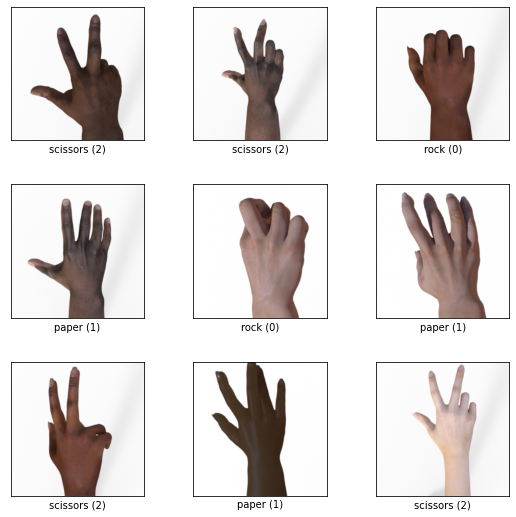

In [11]:
fig = tsdf.show_examples(info, ds_train)

## Additional data prep

In [35]:
train_images = np.array([example['image'].numpy()[:,:,0] for example in ds_train])
train_labels = np.array([example['label'].numpy() for example in ds_train])

test_images = np.array([example['image'].numpy()[:,:,0] for example in ds_test])
test_labels = np.array([example['label'].numpy() for example in ds_test])

In [38]:
train_images = train_images.reshape(2520, 300, 300, 1)
test_images = test_images.reshape(372, 300, 300, 1)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images /= 255
test_images /= 255


In [41]:
train_images[0].shape

(300, 300, 1)

# Train a network (Basic approach)

In [47]:
model = keras.Sequential([
    keras.layers.Flatten(),                                                 # Untuk gambar biar satu kolom dan bisa di_train
    keras.layers.Dense(512, input_shape=(300, 300, 1), activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 88s 1s/step - loss: 26.1150 - accuracy: 0.4425
Epoch 2/5
79/79 [==============================] - 74s 934ms/step - loss: 1.8217 - accuracy: 0.6484
Epoch 3/5
79/79 [==============================] - 67s 847ms/step - loss: 1.7098 - accuracy: 0.6992
Epoch 4/5
79/79 [==============================] - 60s 762ms/step - loss: 0.8282 - accuracy: 0.7913
Epoch 5/5
79/79 [==============================] - 63s 796ms/step - loss: 0.6162 - accuracy: 0.8222


In [48]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 4s 237ms/step - loss: 4.1504 - accuracy: 0.4570


[4.15037727355957, 0.45698925852775574]